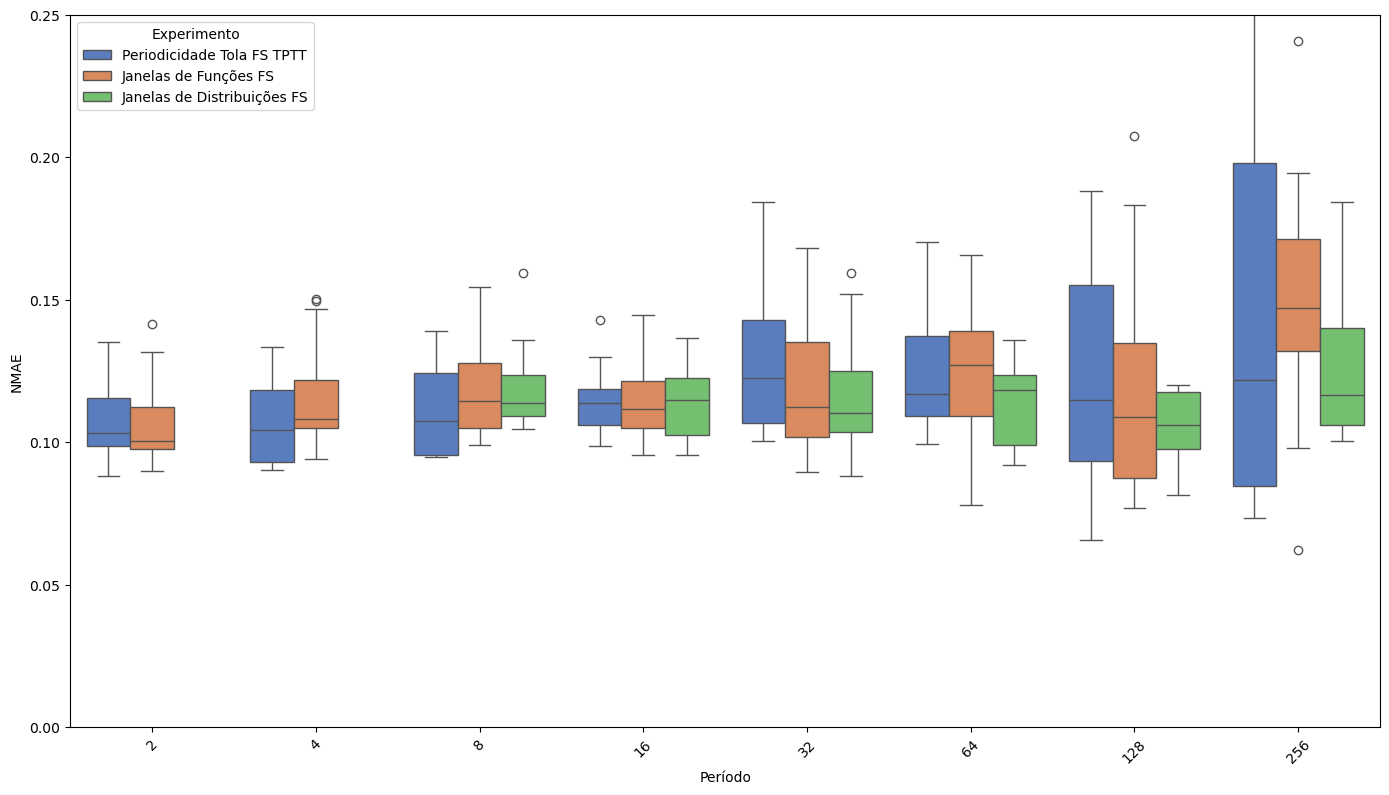

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the three experiments
# subpath_raw = "naive_periodic_experiment/2025-01-06T19:07:27"
# data_raw = pd.read_csv(f'{subpath_raw}/total_X.csv')
# data_raw['Experimento'] = 'Periodicidade Tola'

# subpath_fs = "naive_periodic_experiment/2025-01-06T19:07:27"
# data_fs = pd.read_csv(f'{subpath_fs}/minimal_with_univariate.csv')
# data_fs['Experimento'] = 'Periodicidade Tola FS'

# subpath_tptt = "naive_periodic_experiment_tptt/2025-01-06T19:27:03"
# data_tptt = pd.read_csv(f'{subpath_tptt}/total_X.csv')
# data_tptt['Experimento'] = 'Periodicidade Tola TPTT'

subpath_fs_tptt = "naive_periodic_experiment_tptt/2025-01-06T19:27:03"
data_fs_tptt = pd.read_csv(f'{subpath_fs_tptt}/minimal_with_univariate.csv')
data_fs_tptt['Experimento'] = 'Periodicidade Tola FS TPTT'

subpath_agg_fs = "agg_function_periodic_experiment_y_original/2025-01-06T17:07:48"
data_agg_fs = pd.read_csv(f'{subpath_agg_fs}/minimal_with_univariate.csv')
data_agg_fs['Experimento'] = 'Janelas de Funções FS'

subpath_distrib_fs = "distrib_experiment_y_original/2025-01-05T17:06:02"
data_distrib_fs = pd.read_csv(f'{subpath_distrib_fs}/minimal_with_univariate.csv')
data_distrib_fs['Experimento'] = 'Janelas de Distribuições FS'


data_combined = pd.concat([data_fs_tptt, data_agg_fs,  data_distrib_fs], ignore_index=True)

data_combined.drop(columns=['Unnamed: 6', 'Unnamed: 7'], inplace=True, errors='ignore')

plt.figure(figsize=(14, 8))

sns.boxplot(x='período', y='nmae', hue='Experimento', data=data_combined, palette="muted")

plt.xlabel("Período")
plt.ylabel("NMAE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0, 0.25)
plt.rcParams['font.size'] = 16
plt.show()

In [3]:
import numpy as np
import scipy.stats as st

data_without = np.array([0.1, 0.09, 0.13, 0.12, 0.1, 0.09, 0.10, 0.08])
data_with_fs = np.array([0.14, 0.11, 0.12, 0.11, 0.11, 0.09, 0.10, 0.06])

# Compute mean and standard error
mean = np.mean(data_with_fs)
std = np.std(data_with_fs, ddof=1)
se = std / np.sqrt(len(data_with_fs))

# Compute 95% confidence interval using t-distribution
t_score = st.t.ppf(0.975, df=len(data_with_fs)-1)
ci = t_score * se

# Print result as "mean ± ci"
print(f"Mean ± CI: {mean:.3f} ± {ci:.3f}")


Mean ± CI: 0.105 ± 0.019


In [4]:
data_without = np.array([0.1, 0.09, 0.13, 0.12, 0.1, 0.09, 0.10, 0.08])

# Compute mean and standard error
mean = np.mean(data_without)
std = np.std(data_without, ddof=1)
se = std / np.sqrt(len(data_without))

# Compute 95% confidence interval
z_score = st.norm.ppf(0.975)  # 1.96 for 95% confidence interval
ci = z_score * se

# Print result as "mean ± ci"
print(f"Mean ± CI: {mean:.3f} ± {ci:.3f}")

Mean ± CI: 0.101 ± 0.011


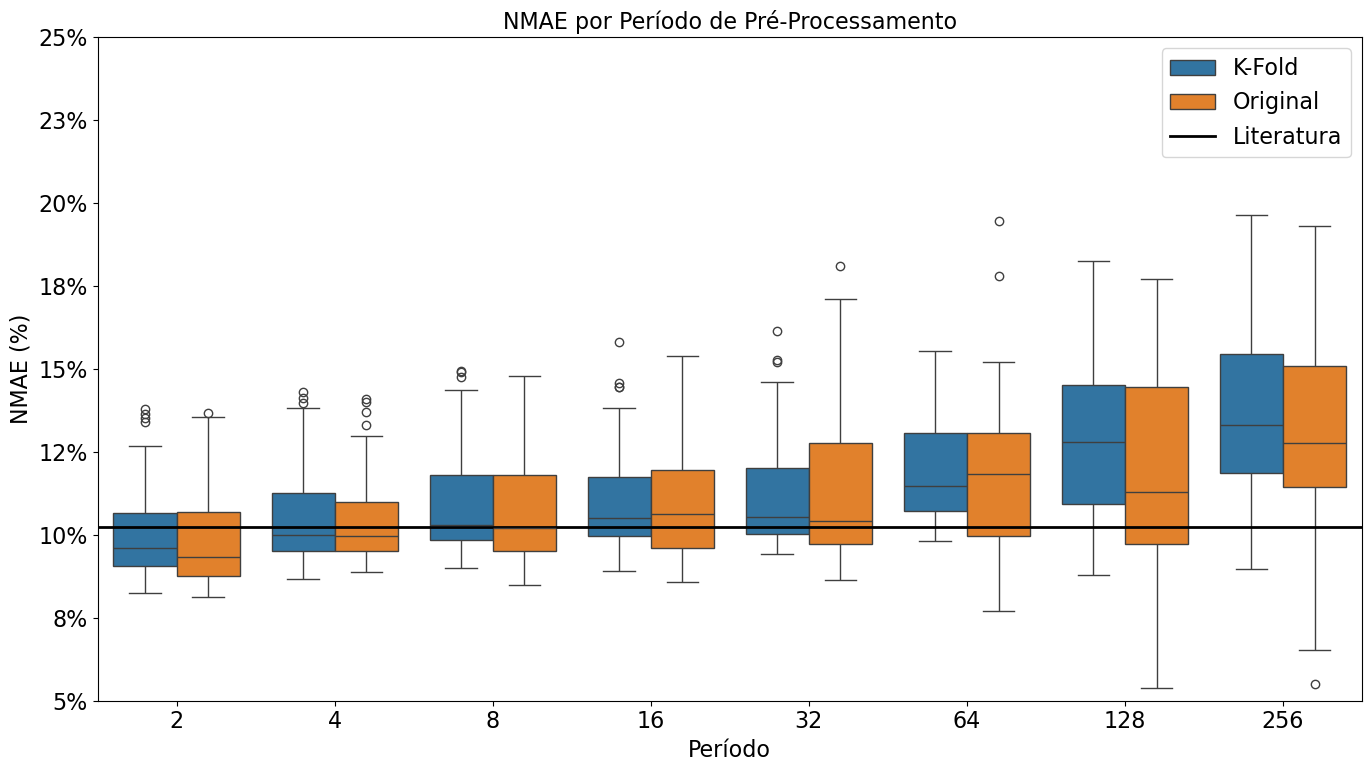

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import pandas as pd
import numpy as np

naive_kfold = pd.read_csv(f'naive_periodic_experiment_k_fold/2025-02-20T23:11:42/total_X.csv', index_col=False)
naive_kfold['Particionamento'] = 'K-Fold'
naive_kfold['Experimento'] = 'Experimento 1'
naive_original = pd.read_csv(f'naive_periodic_experiment/2025-01-06T19:07:27/total_X.csv', index_col=False)
naive_original['Particionamento'] = 'Original'
naive_original['Experimento'] = 'Experimento 1'

agg_kfold = pd.read_csv(f'agg_function_periodic_experiment_y_original_k_fold/2025-02-21T15:33:12/total_X.csv', index_col=False)
agg_kfold['Particionamento'] = 'K-Fold'
agg_kfold['Experimento'] = 'Experimento 2'
agg_original = pd.read_csv(f'agg_function_periodic_experiment_y_original/2025-01-06T17:07:48/total_X.csv', index_col=False)
agg_original['Particionamento'] = 'Original'
agg_original['Experimento'] = 'Experimento 2'

distrib_kfold = pd.read_csv(f'distrib_experiment_y_original_k_fold/2025-02-20T21:51:58/total_X.csv', index_col=False)
distrib_kfold['Particionamento'] = 'K-Fold'
distrib_kfold['Experimento'] = 'Experimento 3'
distrib_original = pd.read_csv(f'distrib_experiment_y_original/2025-01-05T17:06:02/total_X.csv', index_col=False)
distrib_original['Particionamento'] = 'Original'
distrib_original['Experimento'] = 'Experimento 3'

data_combined = pd.concat([naive_kfold, naive_original, agg_kfold, agg_original, distrib_kfold, distrib_original], ignore_index=True)

y_limits = (0.05, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Particionamento')
plt.axhline(y=0.1025, color='black', linestyle='-', linewidth=2, label='Literatura')


plt.xlabel("Período", fontsize=16)
plt.ylabel("NMAE (%)", fontsize=16)
plt.xticks()
plt.title("NMAE por Período de Pré-Processamento", fontsize=16)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.legend(prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

plt.ylim(y_limits)
plt.show()